In [1]:
import numpy as np
import cv2
import sys as s
import random as rd
import matplotlib.pyplot as plt
from PIL import Image
from scipy.sparse import spdiags,linalg,eye

def plot_state(state):
    M,N = np.shape(state)[0],np.shape(state)[1]
    pixels=[]
    for i in range(0,N):
        for j in range(0,N):
            if state[i,j]==1:
                pixels.append((40,250,60))#verde
            if state[i,j]==-1:
                pixels.append((40,60,250))#azul
    im2 = Image.new("RGB", (N,N))
    im2.putdata(pixels)
    plt.imshow(im2)
    plt.show()

In [2]:
def state_0(N):
    state = 2*np.random.randint(2, size=(N,N))-1
    #print(state)
    return state
def energy(state,a,b):
    M,N = np.shape(state)[0],np.shape(state)[1]
    E=0
    nb = state[(a+1)%N,b] + state[a,(b+1)%N] + state[(a-1)%N,b] + state[a,(b-1)%N]   
    E+=-nb*state[a,b]
    return E
def calcMag(config):
    mag = np.sum(config)
    return mag


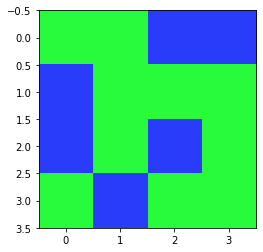

In [3]:
plot_state(state_0(4))

In [4]:
def evolution(state,T,steps):
    beta=1/T
    Mag=[]
    Energy=[]
    passos=[]
    N=np.shape(state)[0]
    for aux in range(steps):
        E=0
        for i in range(np.shape(state)[0]):
            for j in range(np.shape(state)[0]):
                a = np.random.randint(0, N)
                b = np.random.randint(0, N)
                s =  state[a, b]
                #nb = state[(a+1)%N,b] + state[a,(b+1)%N] + state[(a-1)%N,b] + state[a,(b-1)%N]
                nb = state[(a+1)%N,b] + state[a,(b+1)%N] + state[(a-1)%N,b] + state[a,(b-1)%N]
                cost = 2*s*nb
                if cost < 0:
                    s *= -1
                elif rd.random() < np.exp(-cost*beta):
                    s *= -1
                state[a, b] = s
        for i in range(N):
            for j in range(N):
                E+=energy(state,i,j)
        Energy.append(E)
        Mag.append(abs(np.sum(state)/(N*N)))
        passos.append(aux)
        
    return state,Energy,Mag,passos

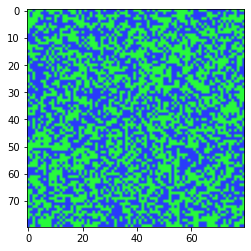

In [5]:
exemplo=state_0(80)
plot_state(exemplo)

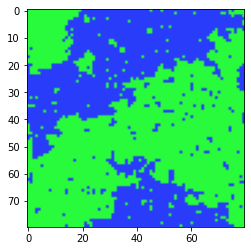

In [6]:
estado_evoluido,Energy,Mag,passos=evolution(exemplo,2,200)
plot_state(estado_evoluido)

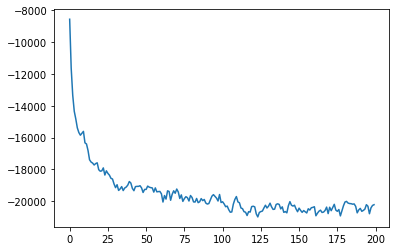

In [7]:
plt.plot(passos,Energy)
plt.show()

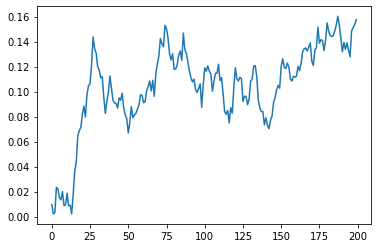

In [8]:
plt.plot(passos,Mag)
plt.show()

In [11]:
Temperatures=np.linspace(1.0,3.0,20)
#print(Temperatures)
x=[]
y=[]
N=80
for T in Temperatures:
    config=state_0(N)
    config,Energy,Mag,passos = evolution(config,T,200)
    config,Energy,Mag,passos = evolution(config,T,10000)
    Mag_medium=abs(sum(Mag)/max(passos))
    y.append(Mag_medium)
    x.append(T)
plt.plot(x,y)
plt.show() 

In [ ]:
# gráfico da energia interna
#         da suceptibilidade magnética (variância magnetização / temperatura)
#         do calor específico (variância da enegia interna / temperatura^2)

In [ ]:
def state_termalizado(state):# works only for square formats
    N = np.shape(state)[0]
    state = evolution(state,T,200)
    return state

In [ ]:
''' suceptibilidade magnética'''
def suceptibilidade_magnética(N):
    for T in Temperatures:
        state = state_0(N)
        state = state_termalizado(state)

        evolved,Energy,Mag,passos = evolution(config,T,200)
        